In [120]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [121]:
df = pd.read_csv("kayseri_houses_day1.csv")
df["Fiyat"] = df["Fiyat"].str.replace(',', '').astype(int)
df.to_csv("kayseri_houses_day1_processed.csv", index=False)
df

,İlan Numarası,İlan Güncelleme Tarihi,Kategorisi,Brüt Metrekare,Binanın Yaşı,Binanın Kat Sayısı,Kullanım Durumu,Yapı Durumu,Eşya Durumu,Banyo Sayısı,...,Bulunduğu Kat,Isıtma Tipi,Krediye Uygunluk,Site İçerisinde,Takas,Fiyat Durumu,Kategori,Konumu,Fiyat,İlan Açıklaması
0,13692421,05 Ağustos 2023,Satılık,175 M2,0 (Yeni),15,Boş,Sıfır,Boş,2,...,10.Kat,Merkezi Doğalgaz,Krediye Uygun Değil,Hayır,Yok,Genel Fiyat,Daire,Kayseri - Kocasinan - Sancaktepe Mahallesi,1900000,NaN
1,13601594,30 Temmuz 2023,Satılık,150 M2,4,8,Mülk Sahibi Oturuyor,Sıfır,NaN,1,...,2.Kat,Merkezi (Pay Ölçer),NaN,Hayır,Var,Genel Fiyat,Daire,Kayseri - Kocasinan - Barbaros Mahallesi,1300000,Gazi Osman da çarşıya yürüme mesafesinde çok g...
2,13579928,18 Temmuz 2023,Satılık,330 M2,0 (Yeni),3,Boş,Sıfır,Boş,3,...,NaN,Kombi Doğalgaz,Krediye Uygun,Hayır,Var,Genel Fiyat,Villa,Kayseri - Melikgazi - Becen Mahallesi,12500000,Becen mah. Aynalı Camii yanında sıfır 11 aya t...
3,13412528,04 Ağustos 2023,Satılık,100 M2,4,4,Kiracı Oturuyor,NaN,NaN,1,...,4.Kat,Merkezi Doğalgaz,Bilinmiyor,Hayır,NaN,Genel Fiyat,Daire,Kayseri - Melikgazi - Selçuklu Mahallesi,2320000,"Binamız doğalgazlıdır., Tapusu; belediye tapus..."
4,13477905,31 Temmuz 2023,Satılık,165 M2,0 (Yeni),4,Boş,NaN,NaN,1,...,3.Kat,Merkezi (Pay Ölçer),NaN,Hayır,Var,Genel Fiyat,Daire,Kayseri - Kocasinan - Şeker Mahallesi,1450000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1494,13687280,04 Ağustos 2023,Satılık,185 M2,1,17,Kiracı Oturuyor,NaN,Boş,2,...,17.Kat,Merkezi (Pay Ölçer),NaN,Hayır,Yok,Genel Fiyat,Daire,Kayseri - Kocasinan - Sahabiye Mahallesi,2300000,NaN
1495,13687281,04 Ağustos 2023,Satılık,110 M2,16-20,3,Mülk Sahibi Oturuyor,NaN,Boş,1,...,Yüksek Giriş,Kombi Doğalgaz,NaN,Hayır,Var,Genel Fiyat,Daire,Kayseri - Melikgazi - Keykubat Mahallesi,885000,NaN
1496,13694476,06 Ağustos 2023,Satılık,150 M2,16-20,14,Mülk Sahibi Oturuyor,NaN,Boş,1,...,1.Kat,Merkezi Doğalgaz,NaN,Hayır,Yok,Genel Fiyat,Daire,Kayseri - Talas - Mevlana Mahallesi,1289000,NaN
1497,13694943,06 Ağustos 2023,Satılık,175 M2,0 (Yeni),12,Boş,NaN,Boş,1,...,2.Kat,Merkezi (Pay Ölçer),NaN,Hayır,Yok,Genel Fiyat,Daire,Kayseri - Melikgazi - Yıldırım Beyazıt Mahallesi,2100000,NaN


In [122]:
df[["Şehir", "İlçe", "Mahalle"]] = df["Konumu"].str.split(" - ", expand=True)
df = df.drop("Konumu", axis=1)
df.to_csv("kayseri_houses_day1_processed.csv", index=False)
df

,İlan Numarası,İlan Güncelleme Tarihi,Kategorisi,Brüt Metrekare,Binanın Yaşı,Binanın Kat Sayısı,Kullanım Durumu,Yapı Durumu,Eşya Durumu,Banyo Sayısı,...,Krediye Uygunluk,Site İçerisinde,Takas,Fiyat Durumu,Kategori,Fiyat,İlan Açıklaması,Şehir,İlçe,Mahalle
0,13692421,05 Ağustos 2023,Satılık,175 M2,0 (Yeni),15,Boş,Sıfır,Boş,2,...,Krediye Uygun Değil,Hayır,Yok,Genel Fiyat,Daire,1900000,NaN,Kayseri,Kocasinan,Sancaktepe Mahallesi
1,13601594,30 Temmuz 2023,Satılık,150 M2,4,8,Mülk Sahibi Oturuyor,Sıfır,NaN,1,...,NaN,Hayır,Var,Genel Fiyat,Daire,1300000,Gazi Osman da çarşıya yürüme mesafesinde çok g...,Kayseri,Kocasinan,Barbaros Mahallesi
2,13579928,18 Temmuz 2023,Satılık,330 M2,0 (Yeni),3,Boş,Sıfır,Boş,3,...,Krediye Uygun,Hayır,Var,Genel Fiyat,Villa,12500000,Becen mah. Aynalı Camii yanında sıfır 11 aya t...,Kayseri,Melikgazi,Becen Mahallesi
3,13412528,04 Ağustos 2023,Satılık,100 M2,4,4,Kiracı Oturuyor,NaN,NaN,1,...,Bilinmiyor,Hayır,NaN,Genel Fiyat,Daire,2320000,"Binamız doğalgazlıdır., Tapusu; belediye tapus...",Kayseri,Melikgazi,Selçuklu Mahallesi
4,13477905,31 Temmuz 2023,Satılık,165 M2,0 (Yeni),4,Boş,NaN,NaN,1,...,NaN,Hayır,Var,Genel Fiyat,Daire,1450000,NaN,Kayseri,Kocasinan,Şeker Mahallesi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1494,13687280,04 Ağustos 2023,Satılık,185 M2,1,17,Kiracı Oturuyor,NaN,Boş,2,...,NaN,Hayır,Yok,Genel Fiyat,Daire,2300000,NaN,Kayseri,Kocasinan,Sahabiye Mahallesi
1495,13687281,04 Ağustos 2023,Satılık,110 M2,16-20,3,Mülk Sahibi Oturuyor,NaN,Boş,1,...,NaN,Hayır,Var,Genel Fiyat,Daire,885000,NaN,Kayseri,Melikgazi,Keykubat Mahallesi
1496,13694476,06 Ağustos 2023,Satılık,150 M2,16-20,14,Mülk Sahibi Oturuyor,NaN,Boş,1,...,NaN,Hayır,Yok,Genel Fiyat,Daire,1289000,NaN,Kayseri,Talas,Mevlana Mahallesi
1497,13694943,06 Ağustos 2023,Satılık,175 M2,0 (Yeni),12,Boş,NaN,Boş,1,...,NaN,Hayır,Yok,Genel Fiyat,Daire,2100000,NaN,Kayseri,Melikgazi,Yıldırım Beyazıt Mahallesi


In [123]:
columns_to_drop = ["Krediye Uygunluk", "İlan Numarası", "İlan Güncelleme Tarihi", "Kategorisi", "İlan Oluşturma Tarihi", "Takas", "Fiyat Durumu"]
processed_data = df.drop(columns=columns_to_drop)
processed_data.to_csv('kayseri_houses_day1_processed.csv', index=False)
processed_data

,Brüt Metrekare,Binanın Yaşı,Binanın Kat Sayısı,Kullanım Durumu,Yapı Durumu,Eşya Durumu,Banyo Sayısı,Türü,Net Metrekare,Oda Sayısı,Bulunduğu Kat,Isıtma Tipi,Site İçerisinde,Kategori,Fiyat,İlan Açıklaması,Şehir,İlçe,Mahalle
0,175 M2,0 (Yeni),15,Boş,Sıfır,Boş,2,Konut,140 M2,3+1,10.Kat,Merkezi Doğalgaz,Hayır,Daire,1900000,NaN,Kayseri,Kocasinan,Sancaktepe Mahallesi
1,150 M2,4,8,Mülk Sahibi Oturuyor,Sıfır,NaN,1,Konut,130 M2,3+1,2.Kat,Merkezi (Pay Ölçer),Hayır,Daire,1300000,Gazi Osman da çarşıya yürüme mesafesinde çok g...,Kayseri,Kocasinan,Barbaros Mahallesi
2,330 M2,0 (Yeni),3,Boş,Sıfır,Boş,3,Konut,304 M2,7+2,NaN,Kombi Doğalgaz,Hayır,Villa,12500000,Becen mah. Aynalı Camii yanında sıfır 11 aya t...,Kayseri,Melikgazi,Becen Mahallesi
3,100 M2,4,4,Kiracı Oturuyor,NaN,NaN,1,Konut,90 M2,3+1,4.Kat,Merkezi Doğalgaz,Hayır,Daire,2320000,"Binamız doğalgazlıdır., Tapusu; belediye tapus...",Kayseri,Melikgazi,Selçuklu Mahallesi
4,165 M2,0 (Yeni),4,Boş,NaN,NaN,1,Konut,120 M2,3+1,3.Kat,Merkezi (Pay Ölçer),Hayır,Daire,1450000,NaN,Kayseri,Kocasinan,Şeker Mahallesi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1494,185 M2,1,17,Kiracı Oturuyor,NaN,Boş,2,Konut,150 M2,3+1,17.Kat,Merkezi (Pay Ölçer),Hayır,Daire,2300000,NaN,Kayseri,Kocasinan,Sahabiye Mahallesi
1495,110 M2,16-20,3,Mülk Sahibi Oturuyor,NaN,Boş,1,Konut,90 M2,2+1,Yüksek Giriş,Kombi Doğalgaz,Hayır,Daire,885000,NaN,Kayseri,Melikgazi,Keykubat Mahallesi
1496,150 M2,16-20,14,Mülk Sahibi Oturuyor,NaN,Boş,1,Konut,130 M2,3+1,1.Kat,Merkezi Doğalgaz,Hayır,Daire,1289000,NaN,Kayseri,Talas,Mevlana Mahallesi
1497,175 M2,0 (Yeni),12,Boş,NaN,Boş,1,Konut,135 M2,3+1,2.Kat,Merkezi (Pay Ölçer),Hayır,Daire,2100000,NaN,Kayseri,Melikgazi,Yıldırım Beyazıt Mahallesi


In [124]:
processed_data['Net Metrekare'] = processed_data['Net Metrekare'].str.replace("M2", "")
processed_data['Net Metrekare'] = processed_data['Net Metrekare'].str.replace('.', '').astype(int)

processed_data['Brüt Metrekare'] = processed_data['Brüt Metrekare'].str.replace("M2", "")
processed_data['Brüt Metrekare'] = processed_data['Brüt Metrekare'].str.replace('.', '').astype(int)
processed_data.to_csv('kayseri_houses_day1_processed.csv', index=False)
processed_data

C:\Users\YSK\AppData\Local\Temp/ipykernel_13188/1472763595.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  processed_data['Net Metrekare'] = processed_data['Net Metrekare'].str.replace('.', '').astype(int)
C:\Users\YSK\AppData\Local\Temp/ipykernel_13188/1472763595.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  processed_data['Brüt Metrekare'] = processed_data['Brüt Metrekare'].str.replace('.', '').astype(int)


,Brüt Metrekare,Binanın Yaşı,Binanın Kat Sayısı,Kullanım Durumu,Yapı Durumu,Eşya Durumu,Banyo Sayısı,Türü,Net Metrekare,Oda Sayısı,Bulunduğu Kat,Isıtma Tipi,Site İçerisinde,Kategori,Fiyat,İlan Açıklaması,Şehir,İlçe,Mahalle
0,175,0 (Yeni),15,Boş,Sıfır,Boş,2,Konut,140,3+1,10.Kat,Merkezi Doğalgaz,Hayır,Daire,1900000,NaN,Kayseri,Kocasinan,Sancaktepe Mahallesi
1,150,4,8,Mülk Sahibi Oturuyor,Sıfır,NaN,1,Konut,130,3+1,2.Kat,Merkezi (Pay Ölçer),Hayır,Daire,1300000,Gazi Osman da çarşıya yürüme mesafesinde çok g...,Kayseri,Kocasinan,Barbaros Mahallesi
2,330,0 (Yeni),3,Boş,Sıfır,Boş,3,Konut,304,7+2,NaN,Kombi Doğalgaz,Hayır,Villa,12500000,Becen mah. Aynalı Camii yanında sıfır 11 aya t...,Kayseri,Melikgazi,Becen Mahallesi
3,100,4,4,Kiracı Oturuyor,NaN,NaN,1,Konut,90,3+1,4.Kat,Merkezi Doğalgaz,Hayır,Daire,2320000,"Binamız doğalgazlıdır., Tapusu; belediye tapus...",Kayseri,Melikgazi,Selçuklu Mahallesi
4,165,0 (Yeni),4,Boş,NaN,NaN,1,Konut,120,3+1,3.Kat,Merkezi (Pay Ölçer),Hayır,Daire,1450000,NaN,Kayseri,Kocasinan,Şeker Mahallesi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1494,185,1,17,Kiracı Oturuyor,NaN,Boş,2,Konut,150,3+1,17.Kat,Merkezi (Pay Ölçer),Hayır,Daire,2300000,NaN,Kayseri,Kocasinan,Sahabiye Mahallesi
1495,110,16-20,3,Mülk Sahibi Oturuyor,NaN,Boş,1,Konut,90,2+1,Yüksek Giriş,Kombi Doğalgaz,Hayır,Daire,885000,NaN,Kayseri,Melikgazi,Keykubat Mahallesi
1496,150,16-20,14,Mülk Sahibi Oturuyor,NaN,Boş,1,Konut,130,3+1,1.Kat,Merkezi Doğalgaz,Hayır,Daire,1289000,NaN,Kayseri,Talas,Mevlana Mahallesi
1497,175,0 (Yeni),12,Boş,NaN,Boş,1,Konut,135,3+1,2.Kat,Merkezi (Pay Ölçer),Hayır,Daire,2100000,NaN,Kayseri,Melikgazi,Yıldırım Beyazıt Mahallesi


In [125]:
processed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Brüt Metrekare      1499 non-null   int32 
 1   Binanın Yaşı        1499 non-null   object
 2   Binanın Kat Sayısı  1499 non-null   int64 
 3   Kullanım Durumu     1499 non-null   object
 4   Yapı Durumu         426 non-null    object
 5   Eşya Durumu         918 non-null    object
 6   Banyo Sayısı        1499 non-null   object
 7   Türü                1499 non-null   object
 8   Net Metrekare       1499 non-null   int32 
 9   Oda Sayısı          1499 non-null   object
 10  Bulunduğu Kat       1302 non-null   object
 11  Isıtma Tipi         1499 non-null   object
 12  Site İçerisinde     1499 non-null   object
 13  Kategori            1499 non-null   object
 14  Fiyat               1499 non-null   int32 
 15  İlan Açıklaması     269 non-null    object
 16  Şehir               1499

In [126]:
processed_data.İlçe.value_counts()

Melikgazi     688
Kocasinan     391
Talas         338
Develi         55
Hacılar        15
İncesu          7
Bünyan          2
Yeşilhisar      1
Felahiye        1
Sarıoğlan       1
Name: İlçe, dtype: int64

In [127]:
processed_data.Mahalle.value_counts()

Mevlana Mahallesi               211
Bahçelievler Mahallesi           89
Gesi Fatih Mahallesi             73
İldem Cumhuriyet Mahallesi       56
Yeşilyurt Mahallesi              50
                               ... 
Oymaağaç Mahallesi                1
Güneyaşağı Mahallesi              1
Kızık Mahallesi                   1
Sindelhöyük Yenice Mahallesi      1
Çevril Mahallesi                  1
Name: Mahalle, Length: 137, dtype: int64

<AxesSubplot:>

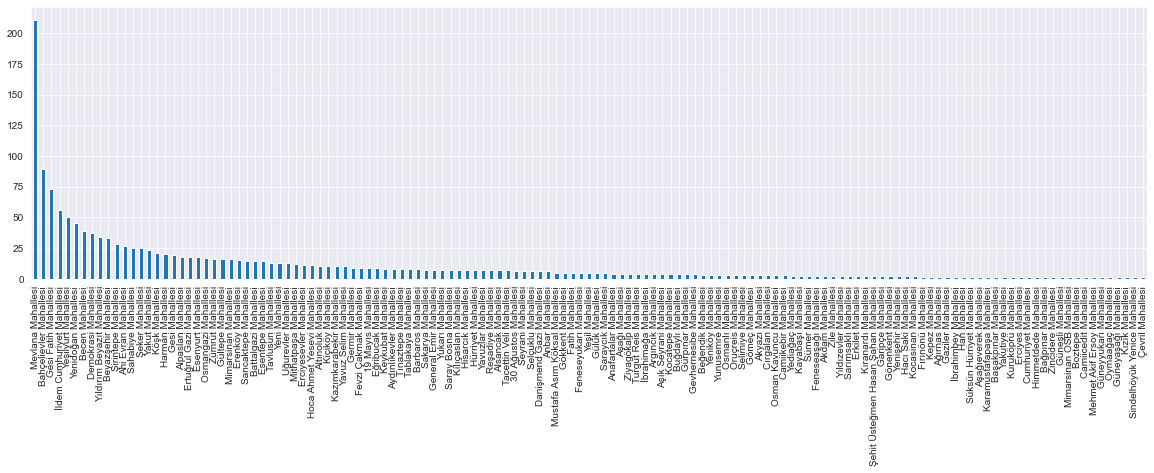

In [128]:
processed_data.Mahalle.value_counts().plot(kind='bar', figsize=(20, 5))

In [129]:
processed_data["Bulunduğu Kat"].value_counts()

1.Kat                154
2.Kat                139
3.Kat                132
4.Kat                131
5.Kat                117
6.Kat                101
7.Kat                 93
9.Kat                 66
8.Kat                 62
12.Kat                48
10.Kat                46
13.Kat                40
11.Kat                37
Düz Giriş (Zemin)     35
Yüksek Giriş          32
14.Kat                29
Çatı Katı              7
Müstakil               6
Villa Tipi             5
Bodrum Kat             5
15.Kat                 3
Bahçe Dublex           3
Kot 1 (-1).Kat         3
Bahçe Katı             3
Kot 2 (-2).Kat         2
17.Kat                 2
Çatı Dubleks           1
Name: Bulunduğu Kat, dtype: int64

In [130]:
processed_data["Binanın Yaşı"].value_counts()

0 (Yeni)       484
5-10           328
11-15          189
21 Ve Üzeri    138
4              101
16-20          101
1               58
3               56
2               44
Name: Binanın Yaşı, dtype: int64

Text(0, 0.5, 'Binanın Yaşı')

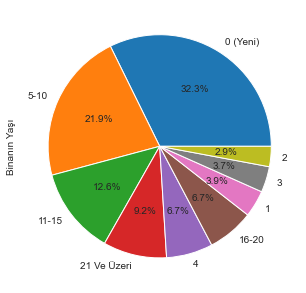

In [131]:
fig = plt.figure(figsize=(5, 15))
processed_data["Binanın Yaşı"].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.ylabel("Binanın Yaşı")

In [132]:
processed_data["Net Metrekare"].describe()

count    1499.000000
mean      152.786524
std       146.219798
min        30.000000
25%       115.500000
50%       135.000000
75%       155.000000
max      3999.000000
Name: Net Metrekare, dtype: float64

In [133]:
processed_data["Oda Sayısı"].value_counts()

3+1       855
2+1       198
4+1       189
5+1        44
1+1        37
2.5+1      36
3.5+1      28
6+1        19
1 Oda      11
4.5+1       9
3+0         9
6+2         9
7+1         8
4+2         8
9+ Oda      7
5+2         6
8+1         5
3+2         5
7+2         2
8+2         2
2+0         2
5+4         2
4+0         1
7+3         1
2+2         1
1.5+1       1
Stüdyo      1
5+3         1
5+0         1
8+4         1
Name: Oda Sayısı, dtype: int64

In [134]:
processed_data["Isıtma Tipi"].value_counts()

Merkezi (Pay Ölçer)    571
Kombi Doğalgaz         399
Merkezi Doğalgaz       387
Sobalı                  72
Isıtma Yok              22
Yerden Isıtma           21
Kat Kaloriferi          12
Merkezi Fueloil          8
Doğalgaz Sobalı          5
Güneş Enerjisi           2
Name: Isıtma Tipi, dtype: int64

In [135]:
processed_data["Kullanım Durumu"].value_counts()

Boş                     878
Kiracı Oturuyor         315
Mülk Sahibi Oturuyor    306
Name: Kullanım Durumu, dtype: int64

In [136]:
processed_data.columns

Index(['Brüt Metrekare', 'Binanın Yaşı', 'Binanın Kat Sayısı',
       'Kullanım Durumu', 'Yapı Durumu', 'Eşya Durumu', 'Banyo Sayısı', 'Türü',
       'Net Metrekare', 'Oda Sayısı', 'Bulunduğu Kat', 'Isıtma Tipi',
       'Site İçerisinde', 'Kategori', 'Fiyat', 'İlan Açıklaması', 'Şehir',
       'İlçe', 'Mahalle'],
      dtype='object')

In [137]:
processed_data_2 = processed_data.copy()
processed_data_2

,Brüt Metrekare,Binanın Yaşı,Binanın Kat Sayısı,Kullanım Durumu,Yapı Durumu,Eşya Durumu,Banyo Sayısı,Türü,Net Metrekare,Oda Sayısı,Bulunduğu Kat,Isıtma Tipi,Site İçerisinde,Kategori,Fiyat,İlan Açıklaması,Şehir,İlçe,Mahalle
0,175,0 (Yeni),15,Boş,Sıfır,Boş,2,Konut,140,3+1,10.Kat,Merkezi Doğalgaz,Hayır,Daire,1900000,NaN,Kayseri,Kocasinan,Sancaktepe Mahallesi
1,150,4,8,Mülk Sahibi Oturuyor,Sıfır,NaN,1,Konut,130,3+1,2.Kat,Merkezi (Pay Ölçer),Hayır,Daire,1300000,Gazi Osman da çarşıya yürüme mesafesinde çok g...,Kayseri,Kocasinan,Barbaros Mahallesi
2,330,0 (Yeni),3,Boş,Sıfır,Boş,3,Konut,304,7+2,NaN,Kombi Doğalgaz,Hayır,Villa,12500000,Becen mah. Aynalı Camii yanında sıfır 11 aya t...,Kayseri,Melikgazi,Becen Mahallesi
3,100,4,4,Kiracı Oturuyor,NaN,NaN,1,Konut,90,3+1,4.Kat,Merkezi Doğalgaz,Hayır,Daire,2320000,"Binamız doğalgazlıdır., Tapusu; belediye tapus...",Kayseri,Melikgazi,Selçuklu Mahallesi
4,165,0 (Yeni),4,Boş,NaN,NaN,1,Konut,120,3+1,3.Kat,Merkezi (Pay Ölçer),Hayır,Daire,1450000,NaN,Kayseri,Kocasinan,Şeker Mahallesi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1494,185,1,17,Kiracı Oturuyor,NaN,Boş,2,Konut,150,3+1,17.Kat,Merkezi (Pay Ölçer),Hayır,Daire,2300000,NaN,Kayseri,Kocasinan,Sahabiye Mahallesi
1495,110,16-20,3,Mülk Sahibi Oturuyor,NaN,Boş,1,Konut,90,2+1,Yüksek Giriş,Kombi Doğalgaz,Hayır,Daire,885000,NaN,Kayseri,Melikgazi,Keykubat Mahallesi
1496,150,16-20,14,Mülk Sahibi Oturuyor,NaN,Boş,1,Konut,130,3+1,1.Kat,Merkezi Doğalgaz,Hayır,Daire,1289000,NaN,Kayseri,Talas,Mevlana Mahallesi
1497,175,0 (Yeni),12,Boş,NaN,Boş,1,Konut,135,3+1,2.Kat,Merkezi (Pay Ölçer),Hayır,Daire,2100000,NaN,Kayseri,Melikgazi,Yıldırım Beyazıt Mahallesi


In [138]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [139]:
processed_data_2["İlçe"] = le.fit_transform(processed_data["İlçe"])
le.classes_

array(['Bünyan', 'Develi', 'Felahiye', 'Hacılar', 'Kocasinan',
       'Melikgazi', 'Sarıoğlan', 'Talas', 'Yeşilhisar', 'İncesu'],
      dtype=object)

In [140]:
le.inverse_transform([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

array(['Bünyan', 'Develi', 'Felahiye', 'Hacılar', 'Kocasinan',
       'Melikgazi', 'Sarıoğlan', 'Talas', 'Yeşilhisar', 'İncesu'],
      dtype=object)

In [141]:
processed_data_2["Kullanım Durumu"] = le.fit_transform(processed_data["Kullanım Durumu"])
le.classes_

array(['Boş', 'Kiracı Oturuyor', 'Mülk Sahibi Oturuyor'], dtype=object)

In [142]:
processed_data_2.to_csv("kayseri_houses_day1_processed2.csv", index=False)

In [143]:
processed_data_2["Bulunduğu Kat"].value_counts()

1.Kat                154
2.Kat                139
3.Kat                132
4.Kat                131
5.Kat                117
6.Kat                101
7.Kat                 93
9.Kat                 66
8.Kat                 62
12.Kat                48
10.Kat                46
13.Kat                40
11.Kat                37
Düz Giriş (Zemin)     35
Yüksek Giriş          32
14.Kat                29
Çatı Katı              7
Müstakil               6
Villa Tipi             5
Bodrum Kat             5
15.Kat                 3
Bahçe Dublex           3
Kot 1 (-1).Kat         3
Bahçe Katı             3
Kot 2 (-2).Kat         2
17.Kat                 2
Çatı Dubleks           1
Name: Bulunduğu Kat, dtype: int64

In [144]:
processed_data_2.loc[processed_data_2["Bulunduğu Kat"] == "Yüksek Giriş", "Bulunduğu Kat"] = "Zemin"
processed_data_2.loc[processed_data_2["Bulunduğu Kat"] == "Düz Giriş", "Bulunduğu Kat"] = "Zemin"

processed_data_2.loc[processed_data_2["Bulunduğu Kat"] == "Yüksek Bodrum", "Bulunduğu Kat"] = "Bodrum"
processed_data_2.loc[processed_data_2["Bulunduğu Kat"] == "Tam Bodrum", "Bulunduğu Kat"] = "Bodrum"
processed_data_2.loc[processed_data_2["Bulunduğu Kat"] == "Yarı Bodrum", "Bulunduğu Kat"] = "Bodrum"
processed_data_2.loc[processed_data_2["Bulunduğu Kat"] == "Tam Bodrum.Kat", "Bulunduğu Kat"] = "Bodrum"


processed_data_2.loc[processed_data_2["Bulunduğu Kat"] == "1.Kat", "Bulunduğu Kat"] = "1-10"
processed_data_2.loc[processed_data_2["Bulunduğu Kat"] == "2.Kat", "Bulunduğu Kat"] = "1-10"
processed_data_2.loc[processed_data_2["Bulunduğu Kat"] == "3.Kat", "Bulunduğu Kat"] = "1-10"
processed_data_2.loc[processed_data_2["Bulunduğu Kat"] == "4.Kat", "Bulunduğu Kat"] = "1-10"
processed_data_2.loc[processed_data_2["Bulunduğu Kat"] == "5.Kat", "Bulunduğu Kat"] = "1-10"
processed_data_2.loc[processed_data_2["Bulunduğu Kat"] == "6.Kat", "Bulunduğu Kat"] = "1-10"
processed_data_2.loc[processed_data_2["Bulunduğu Kat"] == "7.Kat", "Bulunduğu Kat"] = "1-10"
processed_data_2.loc[processed_data_2["Bulunduğu Kat"] == "8.Kat", "Bulunduğu Kat"] = "1-10"
processed_data_2.loc[processed_data_2["Bulunduğu Kat"] == "9.Kat", "Bulunduğu Kat"] = "1-10"
processed_data_2.loc[processed_data_2["Bulunduğu Kat"] == "10.Kat", "Bulunduğu Kat"] = "1-10"

processed_data_2.loc[processed_data_2["Bulunduğu Kat"] == "11.Kat", "Bulunduğu Kat"] = "10-20.Kat"
processed_data_2.loc[processed_data_2["Bulunduğu Kat"] == "12.Kat", "Bulunduğu Kat"] = "10-20.Kat"
processed_data_2.loc[processed_data_2["Bulunduğu Kat"] == "13.Kat", "Bulunduğu Kat"] = "10-20.Kat"
processed_data_2.loc[processed_data_2["Bulunduğu Kat"] == "14.Kat", "Bulunduğu Kat"] = "10-20.Kat"
processed_data_2.loc[processed_data_2["Bulunduğu Kat"] == "15.Kat", "Bulunduğu Kat"] = "10-20.Kat"
processed_data_2.loc[processed_data_2["Bulunduğu Kat"] == "16.Kat", "Bulunduğu Kat"] = "10-20.Kat"
processed_data_2.loc[processed_data_2["Bulunduğu Kat"] == "17.Kat", "Bulunduğu Kat"] = "10-20.Kat"

processed_data_2.loc[processed_data_2["Bulunduğu Kat"] == "Kot 2 (-2).Kat", "Bulunduğu Kat"] = "- Kot"
processed_data_2.loc[processed_data_2["Bulunduğu Kat"] == "Kot 1 (-1).Kat", "Bulunduğu Kat"] = "- Kot"
processed_data_2.loc[processed_data_2["Bulunduğu Kat"] == "Kot 3 (-3).Kat", "Bulunduğu Kat"] = "- Kot"

processed_data_2["Bulunduğu Kat"].value_counts()

1-10                 1041
10-20.Kat             159
Düz Giriş (Zemin)      35
Zemin                  32
Çatı Katı               7
Müstakil                6
Villa Tipi              5
- Kot                   5
Bodrum Kat              5
Bahçe Dublex            3
Bahçe Katı              3
Çatı Dubleks            1
Name: Bulunduğu Kat, dtype: int64

In [145]:
processed_data_2["Bulunduğu Kat"] = le.fit_transform(processed_data_2["Bulunduğu Kat"])
le.classes_

array(['- Kot', '1-10', '10-20.Kat', 'Bahçe Dublex', 'Bahçe Katı',
       'Bodrum Kat', 'Düz Giriş (Zemin)', 'Müstakil', 'Villa Tipi',
       'Zemin', 'Çatı Dubleks', 'Çatı Katı', nan], dtype=object)

In [146]:
processed_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Brüt Metrekare      1499 non-null   int32 
 1   Binanın Yaşı        1499 non-null   object
 2   Binanın Kat Sayısı  1499 non-null   int64 
 3   Kullanım Durumu     1499 non-null   int32 
 4   Yapı Durumu         426 non-null    object
 5   Eşya Durumu         918 non-null    object
 6   Banyo Sayısı        1499 non-null   object
 7   Türü                1499 non-null   object
 8   Net Metrekare       1499 non-null   int32 
 9   Oda Sayısı          1499 non-null   object
 10  Bulunduğu Kat       1499 non-null   int32 
 11  Isıtma Tipi         1499 non-null   object
 12  Site İçerisinde     1499 non-null   object
 13  Kategori            1499 non-null   object
 14  Fiyat               1499 non-null   int32 
 15  İlan Açıklaması     269 non-null    object
 16  Şehir               1499

In [147]:
processed_data_2.loc[processed_data_2["Binanın Yaşı"] == 1, "Binanın Yaşı"] = "1-4"
processed_data_2.loc[processed_data_2["Binanın Yaşı"] == 2, "Binanın Yaşı"] = "1-4"
processed_data_2.loc[processed_data_2["Binanın Yaşı"] == 3, "Binanın Yaşı"] = "1-4"
processed_data_2.loc[processed_data_2["Binanın Yaşı"] == 4, "Binanın Yaşı"] = "1-4"

processed_data_2["Binanın Yaşı"] = le.fit_transform(processed_data["Binanın Yaşı"])
le.classes_

array(['0 (Yeni)', '1', '11-15', '16-20', '2', '21 Ve Üzeri', '3', '4',
       '5-10'], dtype=object)

In [148]:
processed_data_2["Türü"] = le.fit_transform(processed_data["Türü"])
le.classes_

array(['Konut'], dtype=object)

In [149]:
processed_data_2["Oda Sayısı"] = le.fit_transform(processed_data["Oda Sayısı"])
le.classes_

array(['1 Oda', '1+1', '1.5+1', '2+0', '2+1', '2+2', '2.5+1', '3+0',
       '3+1', '3+2', '3.5+1', '4+0', '4+1', '4+2', '4.5+1', '5+0', '5+1',
       '5+2', '5+3', '5+4', '6+1', '6+2', '7+1', '7+2', '7+3', '8+1',
       '8+2', '8+4', '9+ Oda', 'Stüdyo'], dtype=object)

In [150]:
processed_data_2["Şehir"] = le.fit_transform(processed_data["Şehir"])
le.classes_

array(['Kayseri'], dtype=object)

In [151]:
processed_data_2["Mahalle"] = le.fit_transform(processed_data["Mahalle"])
le.classes_

array(['19 Mayıs Mahallesi', '30 Ağustos Mahallesi',
       'Ahi Evran Mahallesi', 'Akdam Mahallesi', 'Akyazı Mahallesi',
       'Alpaslan Mahallesi', 'Alsancak Mahallesi', 'Altınoluk Mahallesi',
       'Anafartalar Mahallesi', 'Anbar Mahallesi', 'Argıncık Mahallesi',
       'Aydınlıkevler Mahallesi', 'Ağırnas Mahallesi', 'Aşağı Mahallesi',
       'Aşağıeverek Mahallesi', 'Aşık Seyrani Mahallesi',
       'Bahçelievler Mahallesi', 'Barbaros Mahallesi',
       'Battalgazi Mahallesi', 'Bağpınar Mahallesi',
       'Başakpınar Mahallesi', 'Becen Mahallesi', 'Beyazşehir Mahallesi',
       'Beğendik Mahallesi', 'Boztepe Mahallesi', 'Buğdaylı Mahallesi',
       'Camiicedit Mahallesi', 'Camiikebir Mahallesi',
       'Cumhuriyet Mahallesi', 'Cırgalan Mahallesi',
       'Danişmend Gazi Mahallesi', 'Demokrasi Mahallesi',
       'Erciyes Mahallesi', 'Erciyesevler Mahallesi', 'Erenköy Mahallesi',
       'Erkilet Mahallesi', 'Ertuğrul Gazi Mahallesi',
       'Esentepe Mahallesi', 'Esenyurt Mahallesi'

In [152]:
processed_data_2["Isıtma Tipi"] = le.fit_transform(processed_data["Isıtma Tipi"])
le.classes_

array(['Doğalgaz Sobalı', 'Güneş Enerjisi', 'Isıtma Yok',
       'Kat Kaloriferi', 'Kombi Doğalgaz', 'Merkezi (Pay Ölçer)',
       'Merkezi Doğalgaz', 'Merkezi Fueloil', 'Sobalı', 'Yerden Isıtma'],
      dtype=object)

In [153]:
processed_data_2.to_csv("kayseri_houses_day1_processed2.csv", index=False)

In [154]:
processed_data_2["Site İçerisinde"] = le.fit_transform(processed_data["Site İçerisinde"])
le.classes_

array(['Evet', 'Hayır'], dtype=object)

In [155]:
processed_data_2["Kategori"] = le.fit_transform(processed_data["Kategori"])
le.classes_

array(['Bina', 'Daire', 'Kooperatif', 'Köy Evi', 'Müstakil Ev',
       'Residence', 'Villa', 'Çiftlik Evi'], dtype=object)

In [156]:
processed_data_2["Eşya Durumu"] = le.fit_transform(processed_data["Eşya Durumu"])
le.classes_

array(['Boş', 'Eşyalı', nan], dtype=object)

In [157]:
processed_data_2["Eşya Durumu"].value_counts()

0    864
2    581
1     54
Name: Eşya Durumu, dtype: int64

In [158]:
processed_data_2["Yapı Durumu"] = le.fit_transform(processed_data["Yapı Durumu"])
le.classes_

array(['Sıfır', 'Yapım Aşamasında', 'İkinci El', nan], dtype=object)

In [159]:
processed_data_2["Banyo Sayısı"] = le.fit_transform(processed_data["Banyo Sayısı"])
le.classes_

array(['1', '2', '3', '4', '5', '6+', 'Yok'], dtype=object)

In [160]:
processed_data_2 = processed_data_2.drop("İlan Açıklaması", axis=1)
processed_data_2.to_csv("kayseri_houses_day1_processed2.csv", index=False)

In [161]:
processed_data_2.describe()

,Brüt Metrekare,Binanın Yaşı,Binanın Kat Sayısı,Kullanım Durumu,Yapı Durumu,Eşya Durumu,Banyo Sayısı,Türü,Net Metrekare,Oda Sayısı,Bulunduğu Kat,Isıtma Tipi,Site İçerisinde,Kategori,Fiyat,Şehir,İlçe,Mahalle
count,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.0,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1.499000e+03,1499.0,1499.000000,1499.000000
mean,197.828552,3.517011,9.117412,0.618412,2.515677,0.811207,0.684456,0.0,152.786524,8.616411,2.959306,5.120747,0.892595,1.583055,2.775531e+06,0.0,5.036024,70.519013
std,236.288026,3.195073,4.561795,0.802920,0.907755,0.963822,0.875321,0.0,146.219798,4.081646,3.878195,1.207217,0.309731,1.495969,9.011989e+06,0.0,1.382239,40.671977
min,43.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.400000e+04,0.0,0.000000,0.000000
25%,140.000000,0.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.0,115.500000,8.000000,1.000000,4.000000,1.000000,1.000000,1.337500e+06,0.0,4.000000,34.000000
50%,165.000000,3.000000,10.000000,0.000000,3.000000,0.000000,1.000000,0.0,135.000000,8.000000,1.000000,5.000000,1.000000,1.000000,1.650000e+06,0.0,5.000000,82.000000
75%,187.000000,7.000000,14.000000,1.000000,3.000000,2.000000,1.000000,0.0,155.000000,8.000000,2.000000,6.000000,1.000000,1.000000,2.350000e+06,0.0,5.000000,107.000000
max,5000.000000,8.000000,35.000000,2.000000,3.000000,2.000000,6.000000,0.0,3999.000000,29.000000,12.000000,9.000000,1.000000,7.000000,3.300000e+08,0.0,9.000000,136.000000


In [162]:
processed_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Brüt Metrekare      1499 non-null   int32
 1   Binanın Yaşı        1499 non-null   int32
 2   Binanın Kat Sayısı  1499 non-null   int64
 3   Kullanım Durumu     1499 non-null   int32
 4   Yapı Durumu         1499 non-null   int32
 5   Eşya Durumu         1499 non-null   int32
 6   Banyo Sayısı        1499 non-null   int32
 7   Türü                1499 non-null   int32
 8   Net Metrekare       1499 non-null   int32
 9   Oda Sayısı          1499 non-null   int32
 10  Bulunduğu Kat       1499 non-null   int32
 11  Isıtma Tipi         1499 non-null   int32
 12  Site İçerisinde     1499 non-null   int32
 13  Kategori            1499 non-null   int32
 14  Fiyat               1499 non-null   int32
 15  Şehir               1499 non-null   int32
 16  İlçe                1499 non-null   int32
